In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import mysql.connector


# .env 파일 로드
load_dotenv()

# 환경 변수 읽기
DB_HOST = os.getenv("DB_HOST")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")
DB_SUER = os.getenv("DB_USER")

In [14]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT 
        report_date, 
        frostbite 
    FROM 
        michelin.naver_trend_day
    ORDER BY report_date ASC;
"""
df = pd.read_sql(query, conn)

# 연결 종료
conn.close()

df['report_date'] = pd.to_datetime(df['report_date'])  # 날짜 형식 변환
df['report_date'] = df['report_date'].dt.to_period('M')  # 년-월 추출


numeric_columns = df.select_dtypes(include=['number']).columns

ndf = df.groupby('report_date')[numeric_columns].mean()

/tmp/ipykernel_15582/2253660563.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT 
        DATE_FORMAT(report_date, '%Y-%m') as report_date, 
        patient_count as patient_count 
    FROM 
        michelin.disease_age 
    where 
        age_group_10 = "계" and 
        category = "한랭질환 "
    ORDER BY report_date ASC;
"""
pdf = pd.read_sql(query, conn)
pdf.set_index("report_date", inplace=True)
pdf
# 연결 종료
conn.close()

/tmp/ipykernel_15582/955185154.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pdf = pd.read_sql(query, conn)


In [10]:
conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_SUER,
    password = DB_PASSWORD,
    database = DB_NAME
)   

cursor = conn.cursor(buffered=True)

# SQL 쿼리 실행 및 데이터 불러오기
query = """
    SELECT 
        report_date, 
        frostbite
    FROM 
        michelin.google_trend_day
    ORDER BY report_date ASC    
    ;
"""
df = pd.read_sql(query, conn)

# 연결 종료
conn.close()

df['report_date'] = pd.to_datetime(df['report_date'])  # 날짜 형식 변환
df['report_date'] = df['report_date'].dt.to_period('M')  # 년-월 추출

numeric_columns = df.select_dtypes(include=['number']).columns

gdf = df.groupby('report_date')[numeric_columns].mean()

/tmp/ipykernel_15582/1814979909.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
print(pdf)

             patient_count
report_date               
2019-01               5510
2019-02               2882
2019-03               1302
2019-04                722
2019-05                442
...                    ...
2024-01               4762
2024-02               2629
2024-03               1880
2024-04                575
2024-05                391

[65 rows x 1 columns]


In [15]:
print(ndf)

             frostbite
report_date           
2019-01       2.943497
2019-02       1.531761
2019-03       0.276193
2019-04       0.195116
2019-05       0.096018
...                ...
2024-01       1.979521
2024-02       0.768575
2024-03       0.493349
2024-04       0.147781
2024-05       0.130119

[65 rows x 1 columns]


In [11]:
print(gdf)

             frostbite
report_date           
2019-01      24.096774
2019-02      24.321429
2019-03      17.161290
2019-04      22.833333
2019-05      19.548387
...                ...
2024-01      68.096774
2024-02      40.551724
2024-03      54.645161
2024-04      55.633333
2024-05      54.258065

[65 rows x 1 columns]


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ndf['frostbite'] = scaler.fit_transform(ndf[['frostbite']])
gdf['frostbite'] = scaler.fit_transform(gdf[['frostbite']])

ndf['frostbite'] = ndf['frostbite'] * (pdf['patient_count'].max() - pdf['patient_count'].min()) + pdf['patient_count'].min()
gdf['frostbite'] = gdf['frostbite'] * (pdf['patient_count'].max() - pdf['patient_count'].min()) + pdf['patient_count'].min()

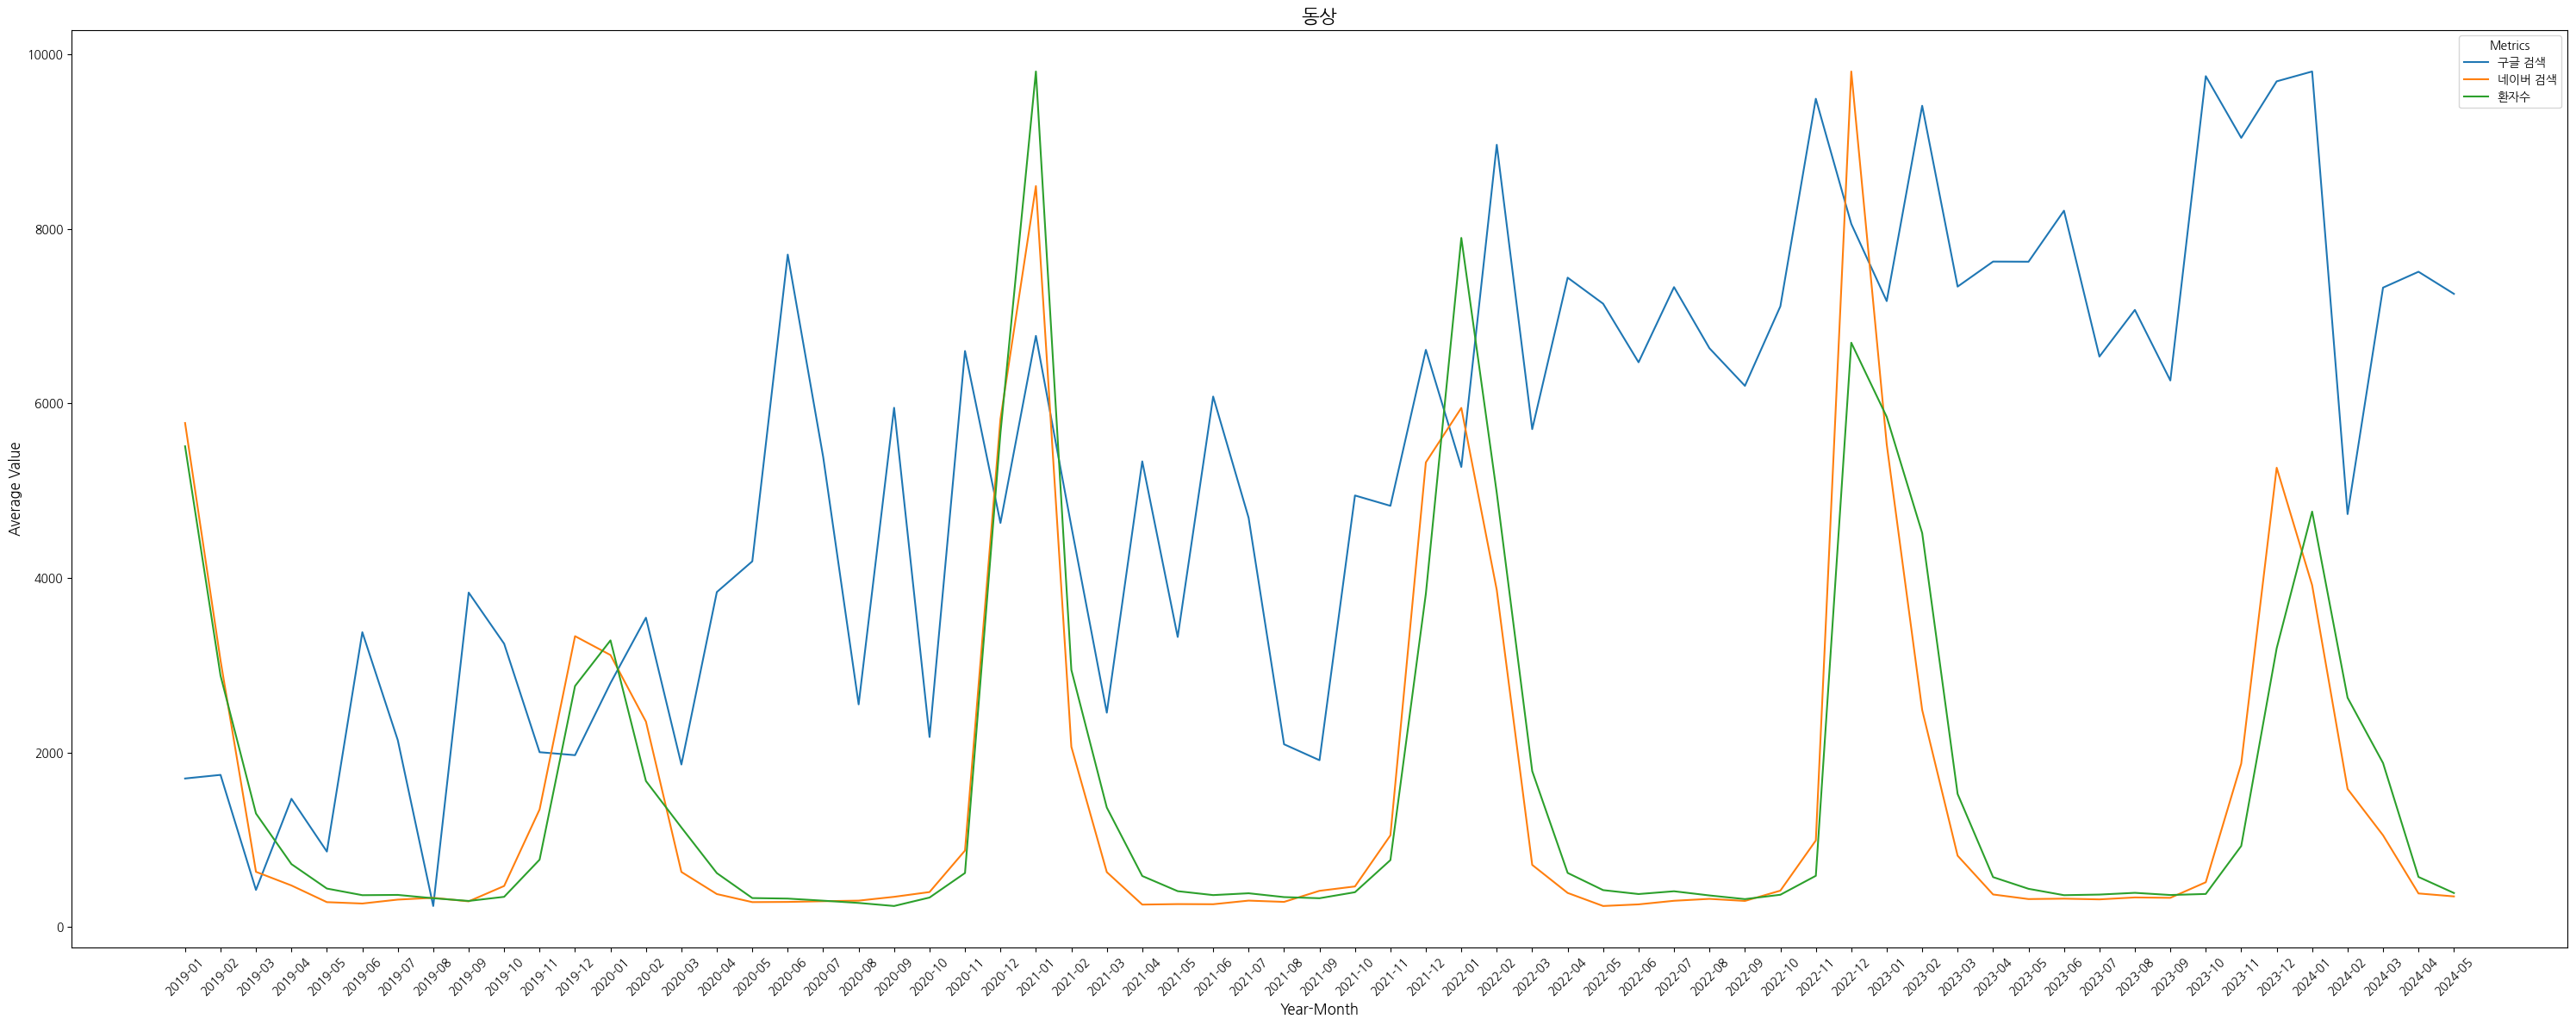

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(30, 12))
plt.plot(gdf.index.astype(str), gdf["frostbite"], label=("구글 검색"))
plt.plot(ndf.index.astype(str), ndf["frostbite"], label=("네이버 검색"))
plt.plot(pdf.index.astype(str), pdf["patient_count"], label=("환자수"))

plt.title("동상", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
ndf = ndf.reset_index()
print(ndf["report_date"].unique())
print(len(ndf["report_date"].unique()))

<PeriodArray>
['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07',
 '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
 '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
 '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
 '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
 '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
 '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
 '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08',
 '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03',
 '2024-04', '2024-05']
Length: 65, dtype: period[M]
65


In [14]:
pdf = pdf.reset_index()
print(pdf["report_date"].unique())
print(len(pdf["report_date"].unique()))

['2019-01' '2019-02' '2019-03' '2019-04' '2019-05' '2019-06' '2019-07'
 '2019-08' '2019-09' '2019-10' '2019-11' '2019-12' '2020-01' '2020-02'
 '2020-03' '2020-04' '2020-05' '2020-06' '2020-07' '2020-08' '2020-09'
 '2020-10' '2020-11' '2020-12' '2021-01' '2021-02' '2023-03' '2023-04'
 '2023-05' '2023-06' '2023-07' '2023-08' '2023-09' '2023-10' '2023-11'
 '2023-12' '2024-01' '2024-02' '2024-03' '2024-04' '2024-05' '2021-03'
 '2021-04' '2021-05' '2021-06' '2021-07' '2021-08' '2021-09' '2021-10'
 '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04' '2022-05'
 '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11' '2022-12'
 '2023-01' '2023-02']
65
